In [1]:
# Nativos
import random as rn
import os
import sys
import gc
import json

#calculo
import numpy as np
import pandas as pd
import scipy as sp

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
#from graphs import *

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['.ipynb_checkpoints',
 'CONTENT_CATEGORY.zip',
 'CONTENT_CATEGORY_BOTTOM.zip',
 'CONTENT_CATEGORY_TOP.zip',
 'conversiones.zip',
 'data.zip',
 'data2.zip',
 'device_data.zip',
 'PAGE.zip',
 'pageviews.zip',
 'pageviews_complemento.zip',
 'pageview_with_previous_2.csv',
 'sampleSubmission.zip',
 'SITE_ID.zip']

In [2]:
sub = pd.read_csv('data/sampleSubmission.zip')
print(sub.shape)

sub.head()

(11676, 2)


,USER_ID,SCORE
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [3]:
sub.dtypes

USER_ID    int64
SCORE      int64
dtype: object

In [4]:
predict = pd.read_csv('lgbm_time_split_0.8338701468227765_lasso_mean.csv')
print(predict.shape)

predict.head()

(11429, 2)


,USER_ID,SCORE
0,0,0.025125
1,1,0.010351
2,2,0.008421
3,3,0.011329
4,4,0.016016


In [15]:
predict_2 = pd.read_csv('lgbm_time_split_0.8338701468227765_lasso_median.csv')
print(predict_2.shape)

predict_2.head()

(11429, 2)


,USER_ID,SCORE
0,0,0.025125
1,1,0.010351
2,2,0.008421
3,3,0.011329
4,4,0.016016


<AxesSubplot:>

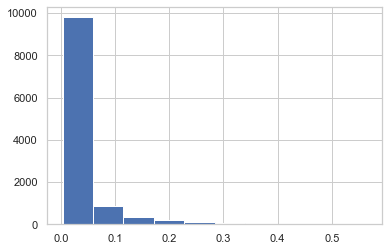

In [5]:
predict['SCORE'].hist()

In [6]:
sub = sub.merge(predict, how='left', on=['USER_ID'])
sub.isnull().sum()

USER_ID      0
SCORE_x      0
SCORE_y    247
dtype: int64

In [11]:
sub['SCORE'] = sub['SCORE_y'].combine_first(sub['SCORE_x'])
del sub['SCORE_y']
del sub['SCORE_x']

sub.head()

,USER_ID,SCORE
0,0,0.025125
1,1,0.010351
2,2,0.008421
3,3,0.011329
4,4,0.016016


In [14]:
sub.shape

(11676, 2)

In [13]:
sub.to_csv('lgbm_time_split_0.8338701468227765_lasso_mean.csv', index=False)